Enter Libraries here

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
import scipy as sp
from scipy import stats
from scipy.stats import probplot
from scipy.stats import norm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.stats import iqr
#For Importing from Google Drive directly
#!pip install PyDrive
#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from oauth2client.client import GoogleCredentials
#gauth.authenticate_user()
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive = GoogleDrive(gauth)
#downloaded = drive.CreateFile({'id': "1sqji8RtjLPr1X_4FRafEoO6FV_rdnsAu"})
#downloaded.GetContentFile('USP senator list (2018 update).csv')
##########################################################




In [ ]:
#@title
dataset = pd.read_csv('USP senator list (2018 update).csv', encoding='latin1', header=0)
X = dataset.values
print(len(dataset))
dataset.drop_duplicates()

3421


,year,state,state_po,state_fips,state_cen,state_ic,stage,special,party,writein,candidatevotes,totalvotes,unofficial
0,1976,Arizona,AZ,4.0,86,61.0,gen,False,republican,False,321236.0,741210.0,False
1,1976,Arizona,AZ,4.0,86,61.0,gen,False,independent,False,1565.0,741210.0,False
2,1976,Arizona,AZ,4.0,86,61.0,gen,False,democrat,False,400334.0,741210.0,False
3,1976,Arizona,AZ,4.0,86,61.0,gen,False,libertarian,False,7310.0,741210.0,False
4,1976,Arizona,AZ,4.0,86,61.0,gen,False,independent,False,10765.0,741210.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3416,2018,Wisconsin,WI,55.0,35,25.0,gen,False,NaN,True,42.0,2657841.0,False
3417,2018,Wyoming,WY,56.0,83,68.0,gen,False,republican,False,136210.0,203420.0,False
3418,2018,Wyoming,WY,56.0,83,68.0,gen,False,democrat,False,61227.0,203420.0,False
3419,2018,Wyoming,WY,56.0,83,68.0,gen,False,libertarian,False,5658.0,203420.0,False


In [ ]:
imputer1 = SimpleImputer(missing_values=np.nan, strategy='mean')
X[:, 10:12] = imputer1.fit_transform(X[:, 10:12])
imputer2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X[:, :] = imputer2.fit_transform(X[:, :])
imputer3 = SimpleImputer(missing_values='NA', strategy='most_frequent')
X[:, :] = imputer3.fit_transform(X[:, :])
X = pd.DataFrame(X)
X.columns = dataset.columns
X.index = dataset.index
X

,year,state,state_po,state_fips,state_cen,state_ic,stage,special,party,writein,candidatevotes,totalvotes,unofficial
0,1976,Arizona,AZ,4,86,61,gen,False,republican,False,321236,741210,False
1,1976,Arizona,AZ,4,86,61,gen,False,independent,False,1565,741210,False
2,1976,Arizona,AZ,4,86,61,gen,False,democrat,False,400334,741210,False
3,1976,Arizona,AZ,4,86,61,gen,False,libertarian,False,7310,741210,False
4,1976,Arizona,AZ,4,86,61,gen,False,independent,False,10765,741210,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3416,2018,Wisconsin,WI,55,35,25,gen,False,republican,True,42,2.65784e+06,False
3417,2018,Wyoming,WY,56,83,68,gen,False,republican,False,136210,203420,False
3418,2018,Wyoming,WY,56,83,68,gen,False,democrat,False,61227,203420,False
3419,2018,Wyoming,WY,56,83,68,gen,False,libertarian,False,5658,203420,False


Text(0, 0.5, 'totalvotes per 10 million')

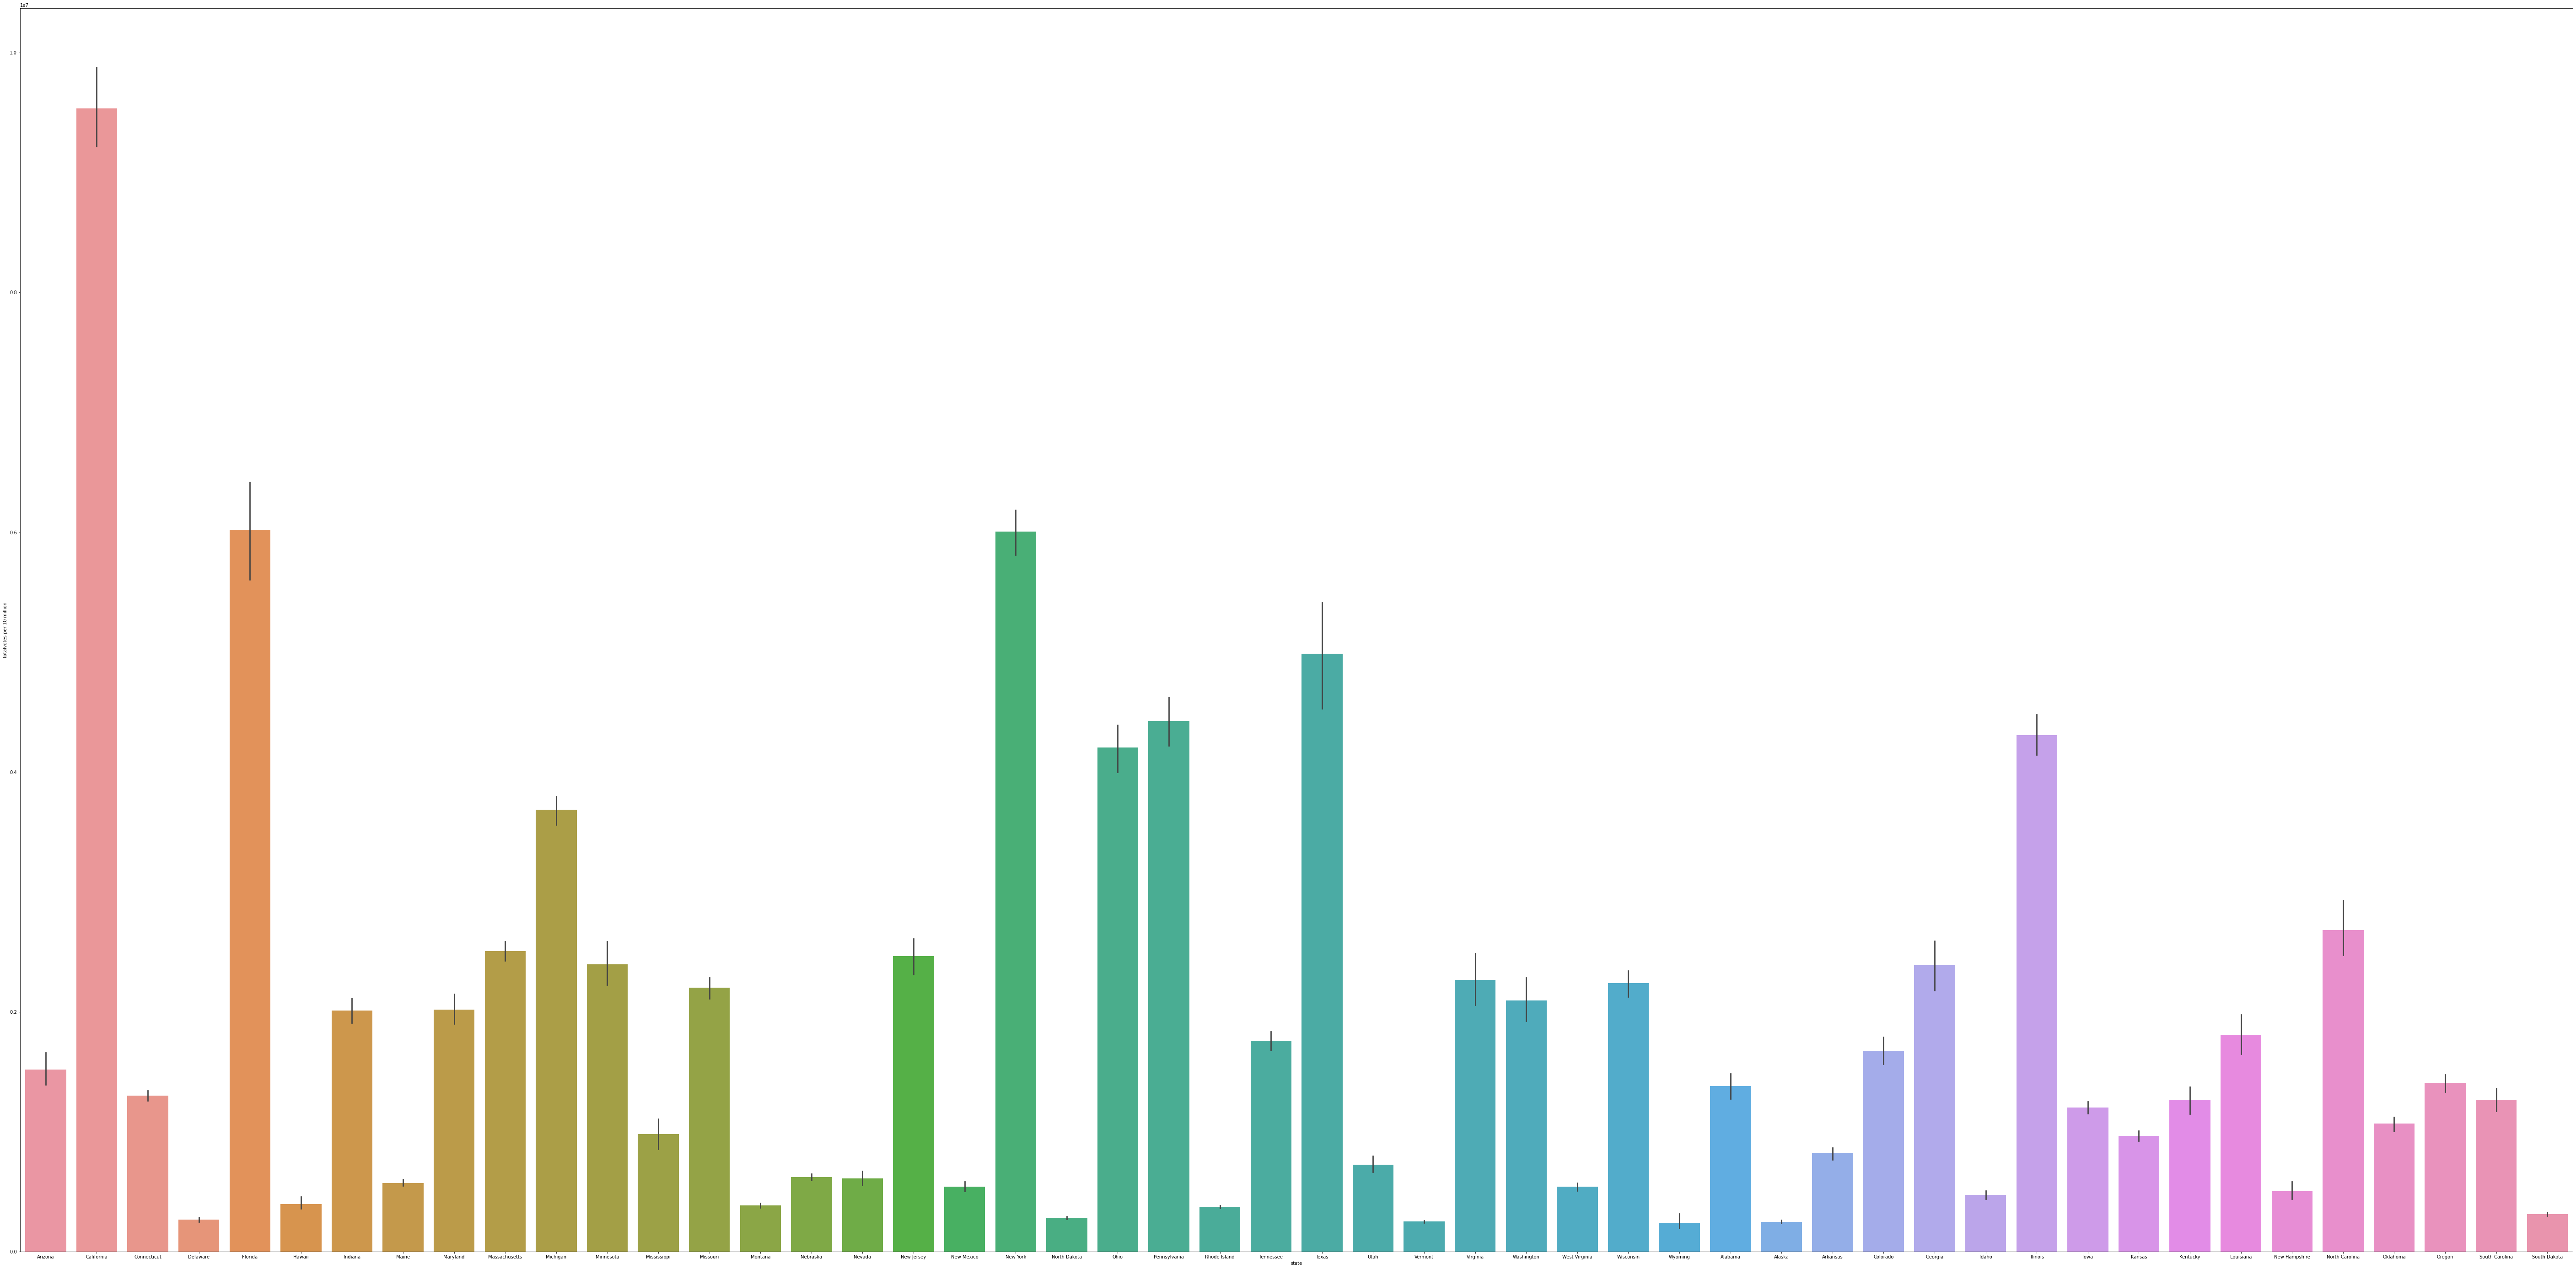

In [ ]:
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(100,50)
sns.barplot(data=X, x='state',  y='totalvotes')
plt.ylabel("totalvotes per 10 million")


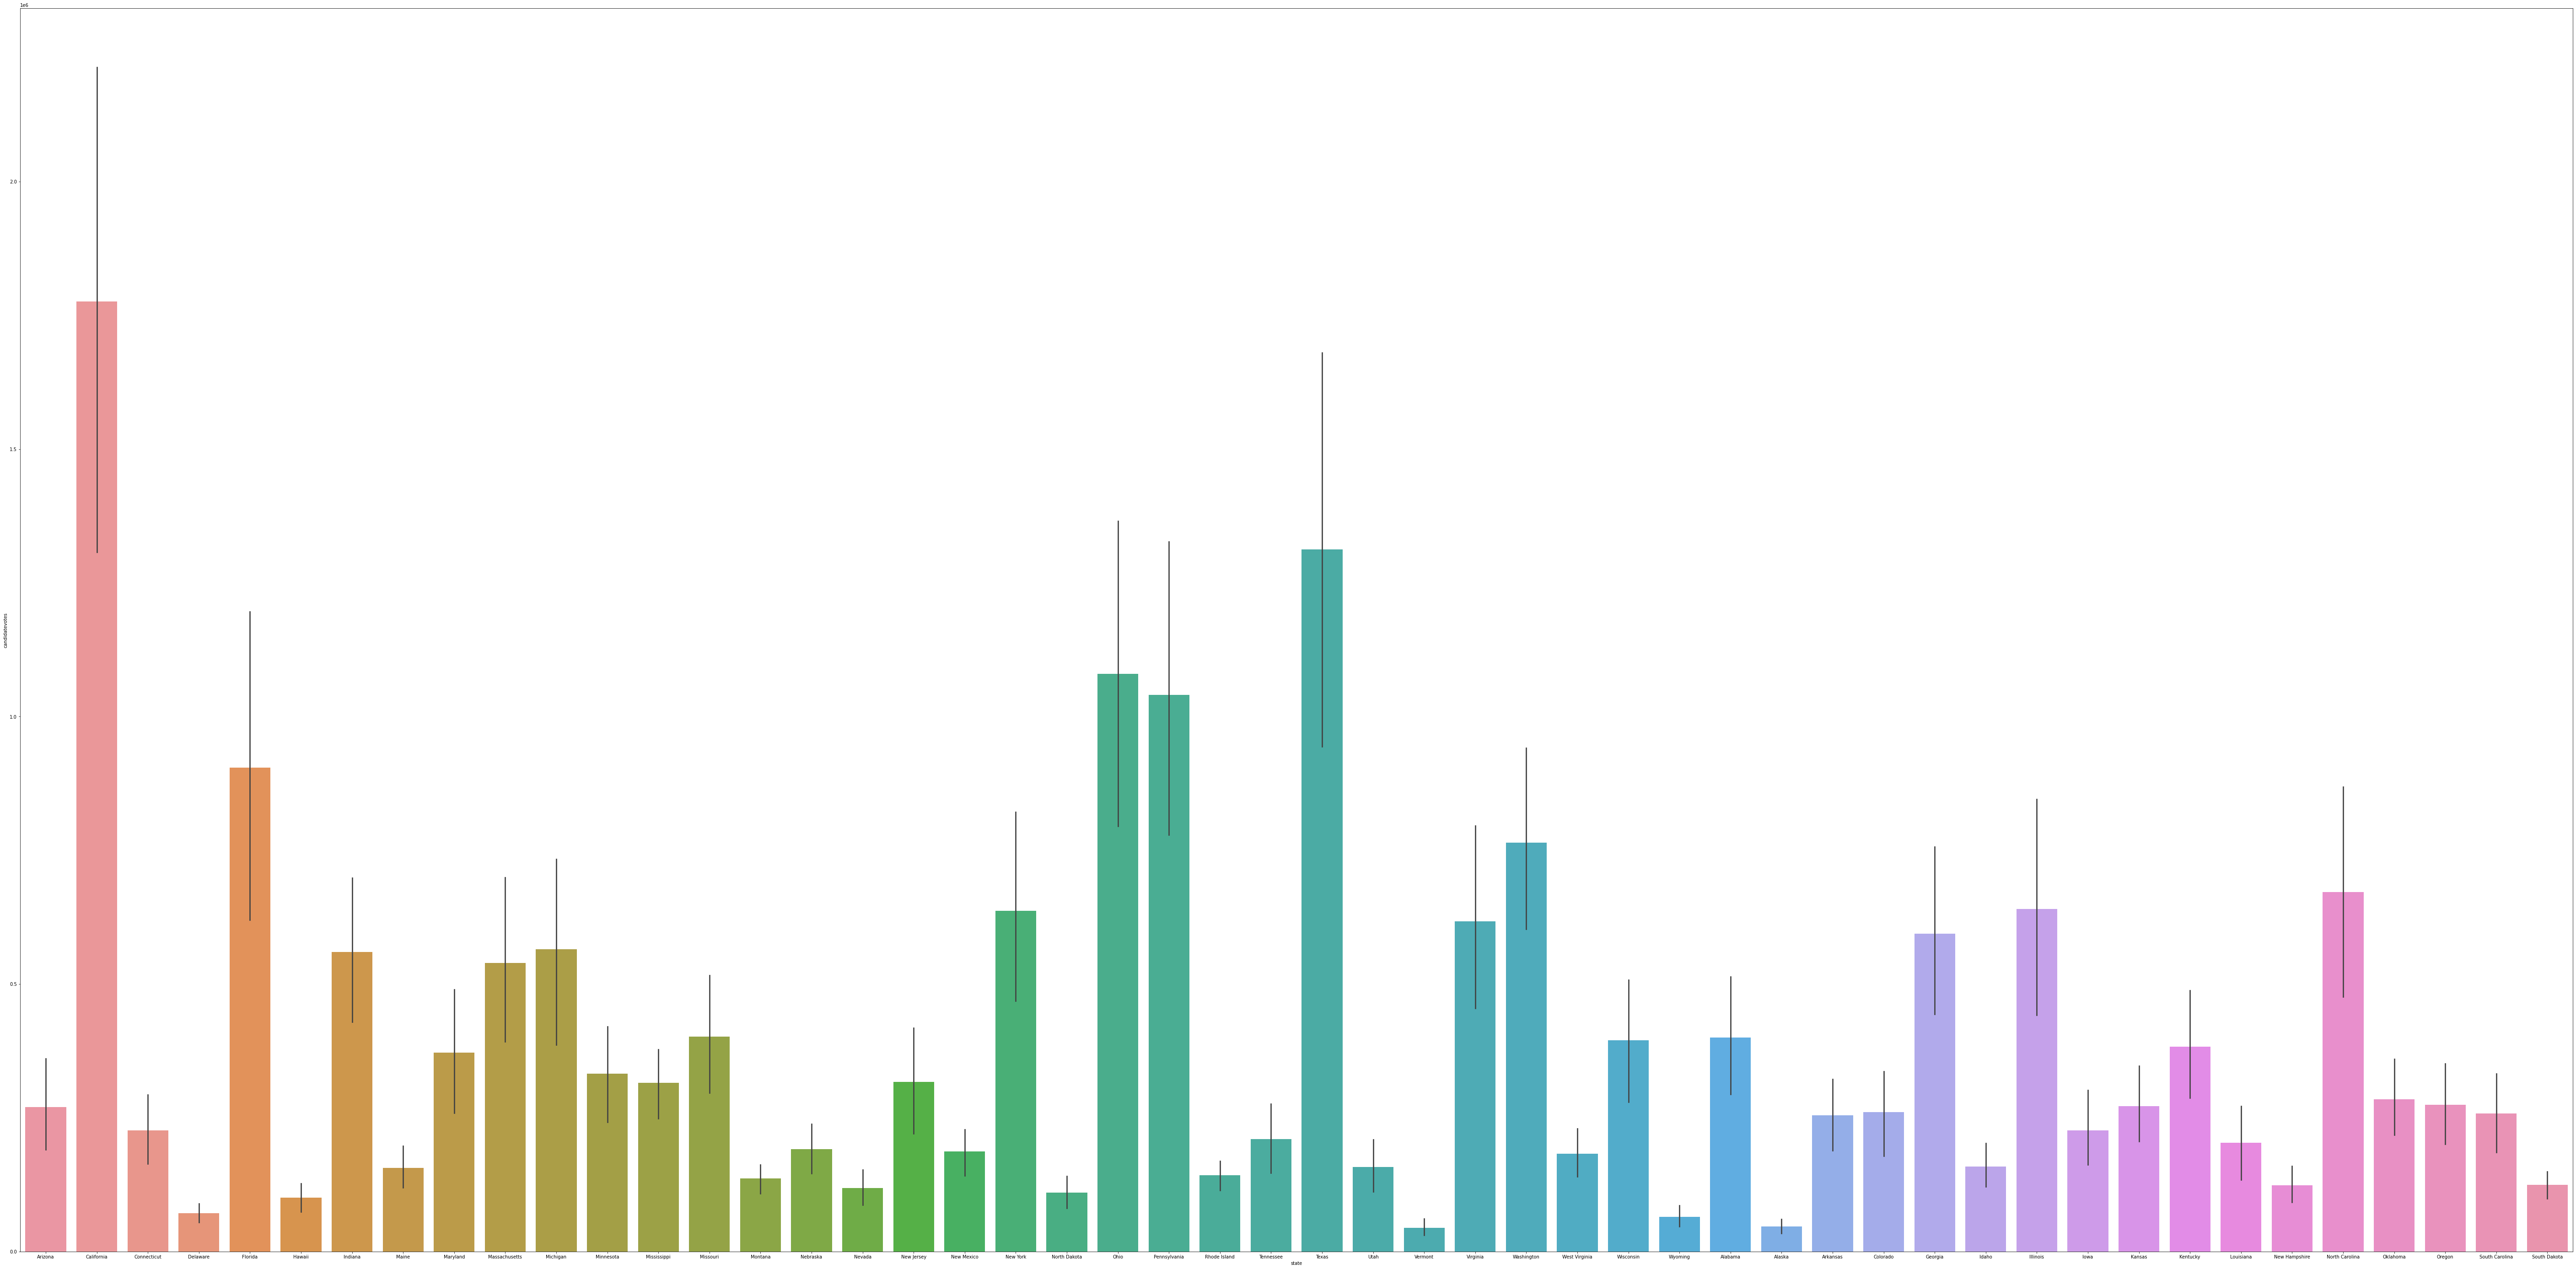

In [ ]:
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(100,50)
sns.barplot(data=X, x='state',  y='candidatevotes')


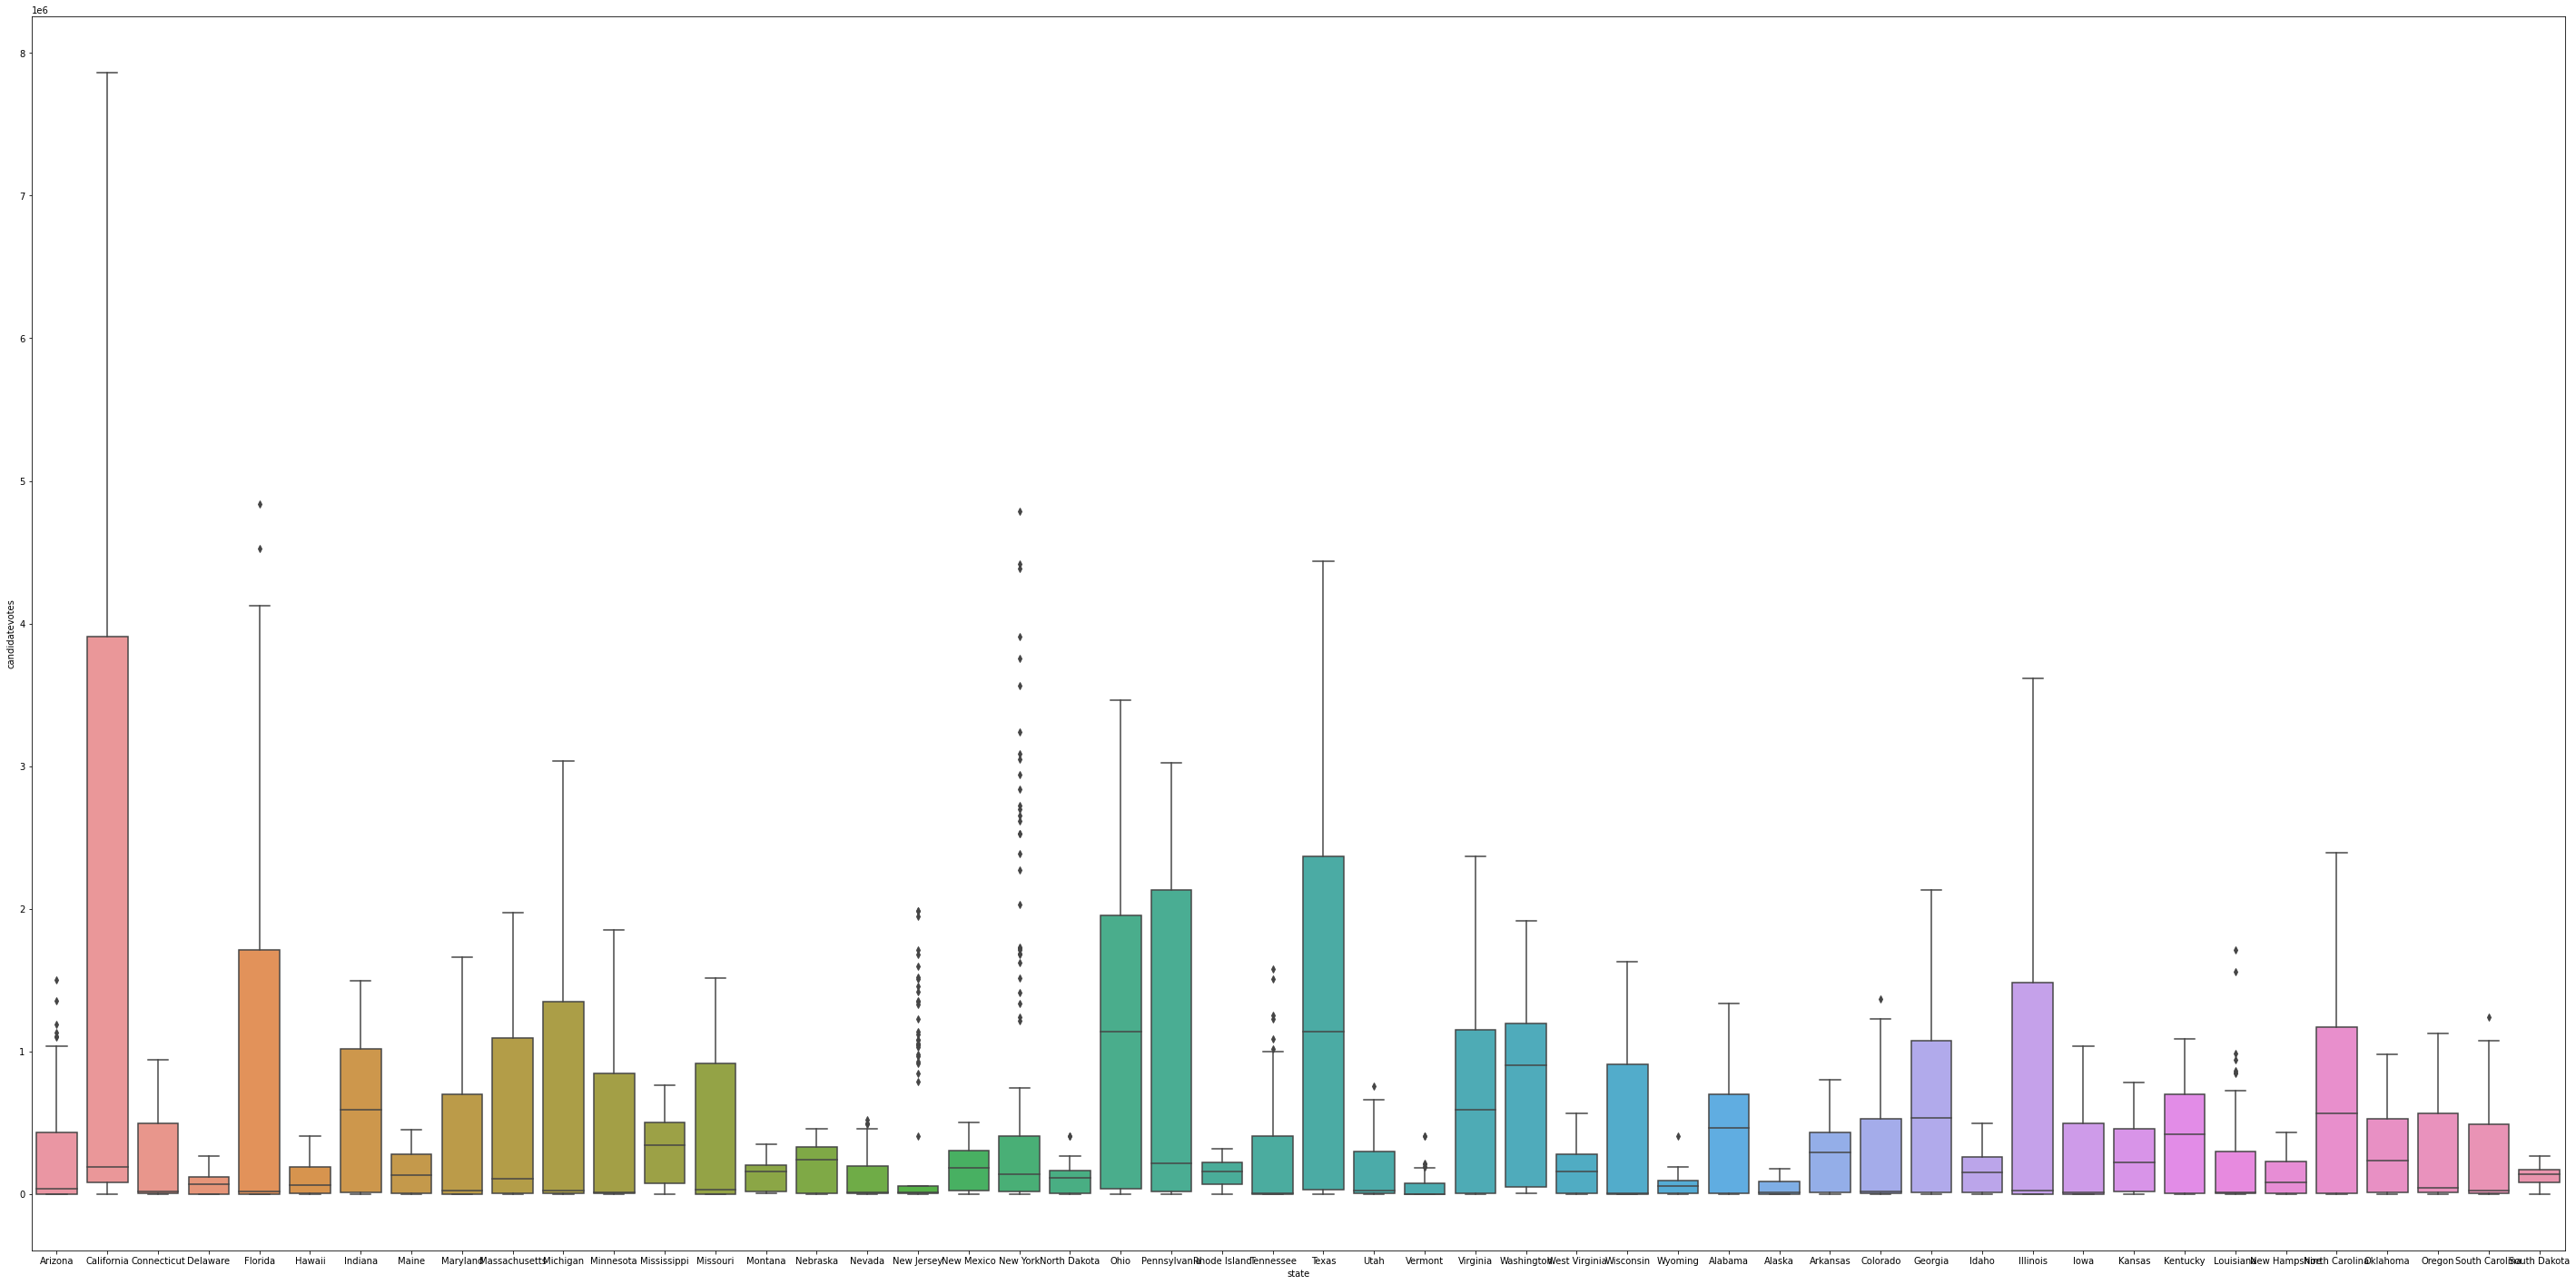

In [ ]:
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(50,25)
sns.boxplot(x="state", y="candidatevotes",
            data=X)

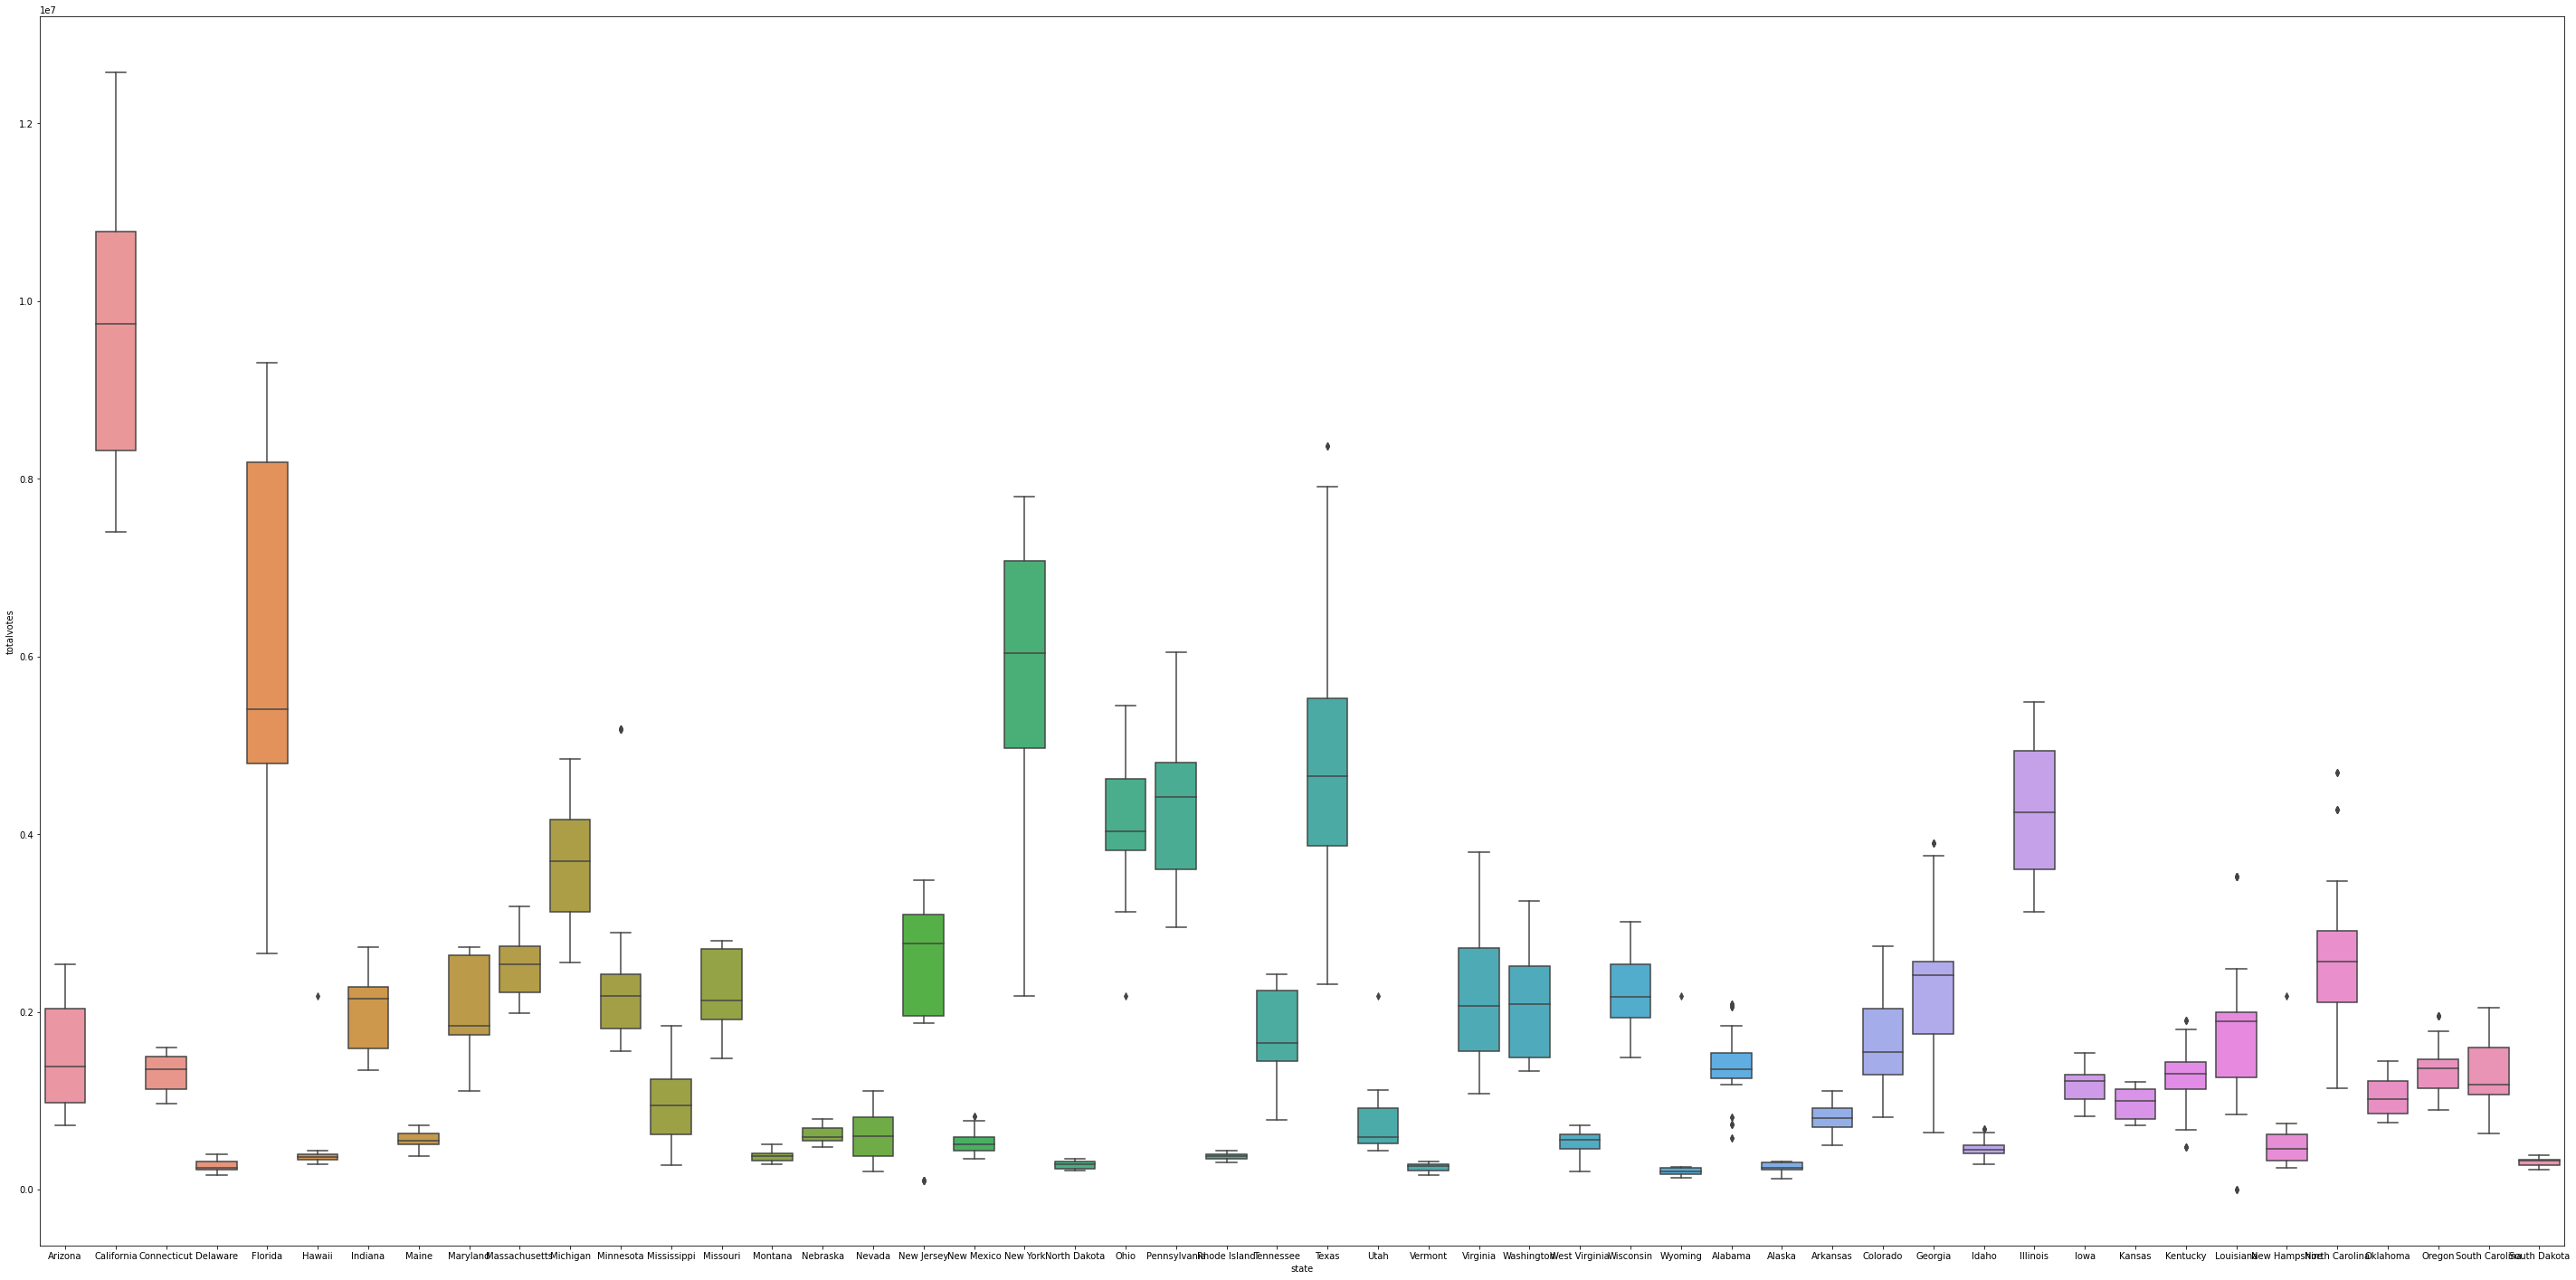

In [ ]:

fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(50,25)
sns.boxplot(x="state", y="totalvotes",
            data=X)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


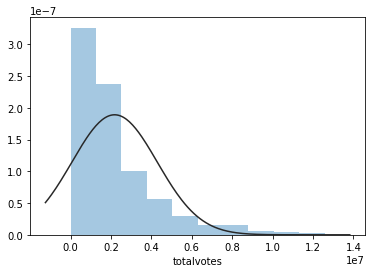

In [ ]:
sns.distplot(X.totalvotes,kde=False, fit=norm, bins=10
             )

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


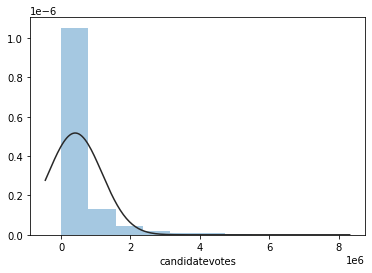

In [ ]:
sns.distplot(X.candidatevotes,kde=False, fit=norm, bins=10
             )

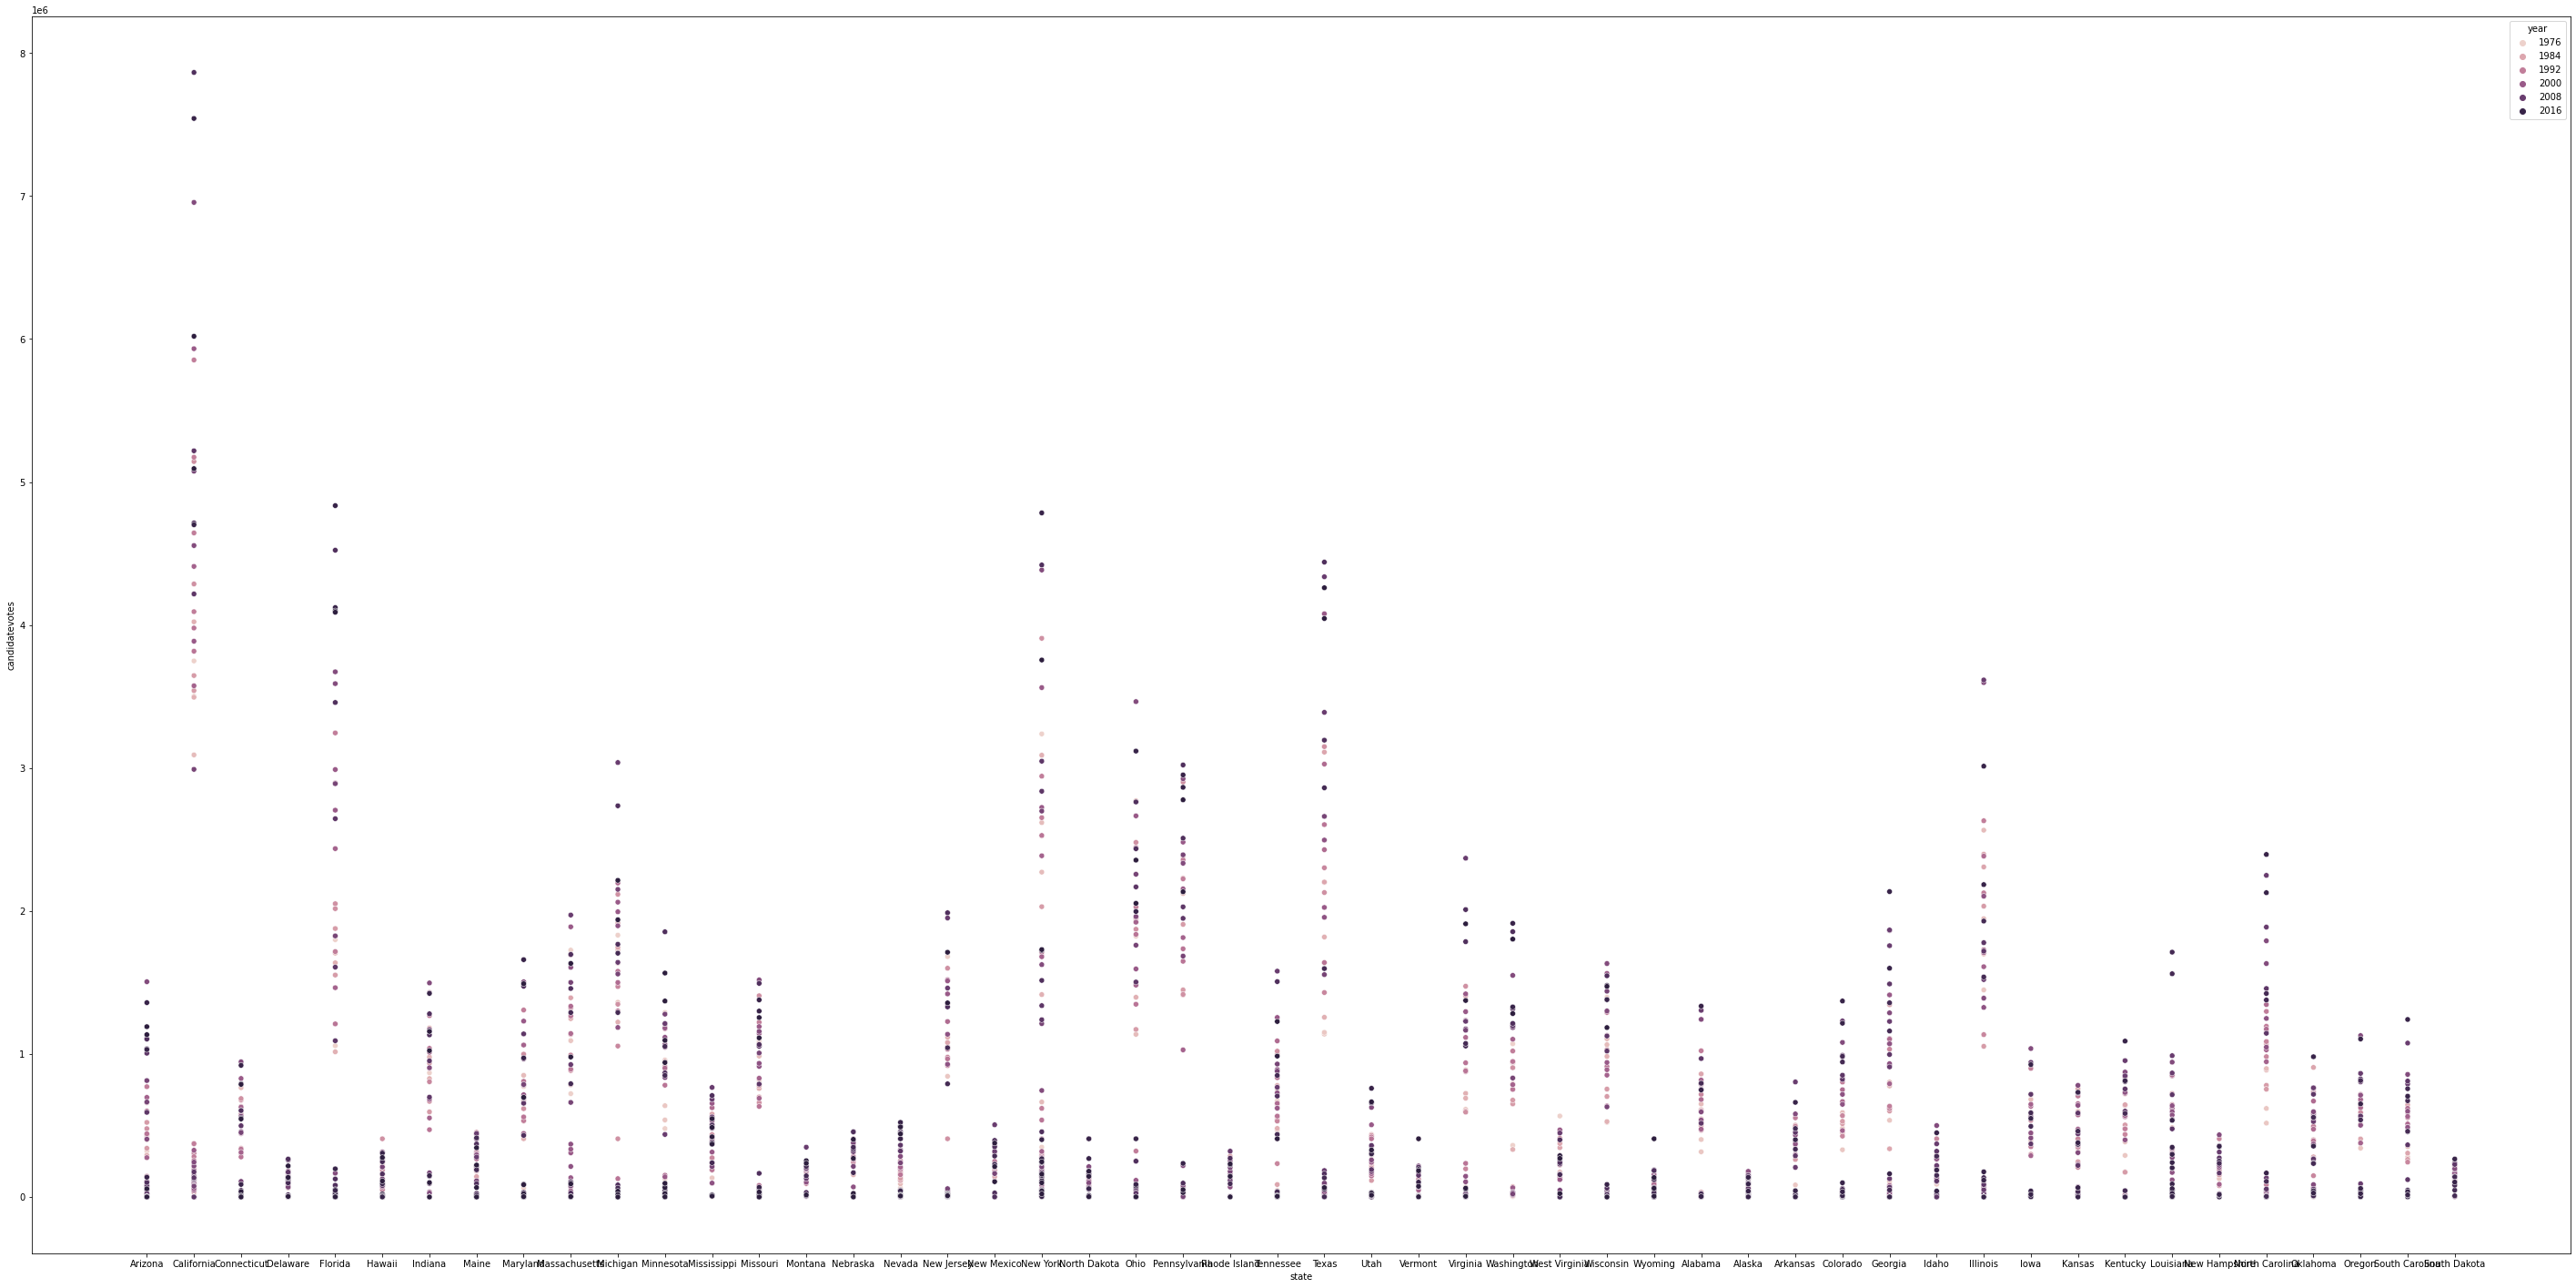

In [ ]:
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(50,25)
sns.scatterplot(data=X, x='state', y='candidatevotes',hue='year')

In [ ]:
mean5 = X['candidatevotes'].mean()
mean6 = X['totalvotes'].mean()
var5 = X['candidatevotes'].var()
var6 = X['totalvotes'].var()
print ('Mean candidate votes: ' + str(mean5))
print ('Mean total votes: ' + str(mean6))
print ('Var of candidate votes: ' + str(var5))
print ('Var of total votes: ' + str(var6))

Mean candidate votes: 407173.8979111501
Mean total votes: 2180074.3511293638
Var of candidate votes: 595451963709.442
Var of total votes: 4458721720738.29


In [ ]:
x_array = np.array(X['candidatevotes'])
normalized_X = preprocessing.normalize([x_array])
y_array = np.array(X['totalvotes'])
normalized_Y = preprocessing.normalize([y_array])
print('normalization of candidate votes:' +str(normalized_X))
print('normalization of total votes:' +str(normalized_Y))
result_X = normalized_X.flatten()
result_Y = normalized_Y.flatten()
X['normalized_X']= result_X
X['normalized_Y']= result_Y


normalization of candidate votes:[[6.29558080e-03 3.06708586e-05 7.84574283e-03 ... 1.19992630e-03
  1.10885443e-04 7.97979110e-03]]
normalization of total votes:[[0.00417572 0.00417572 0.00417572 ... 0.001146   0.001146   0.01228179]]


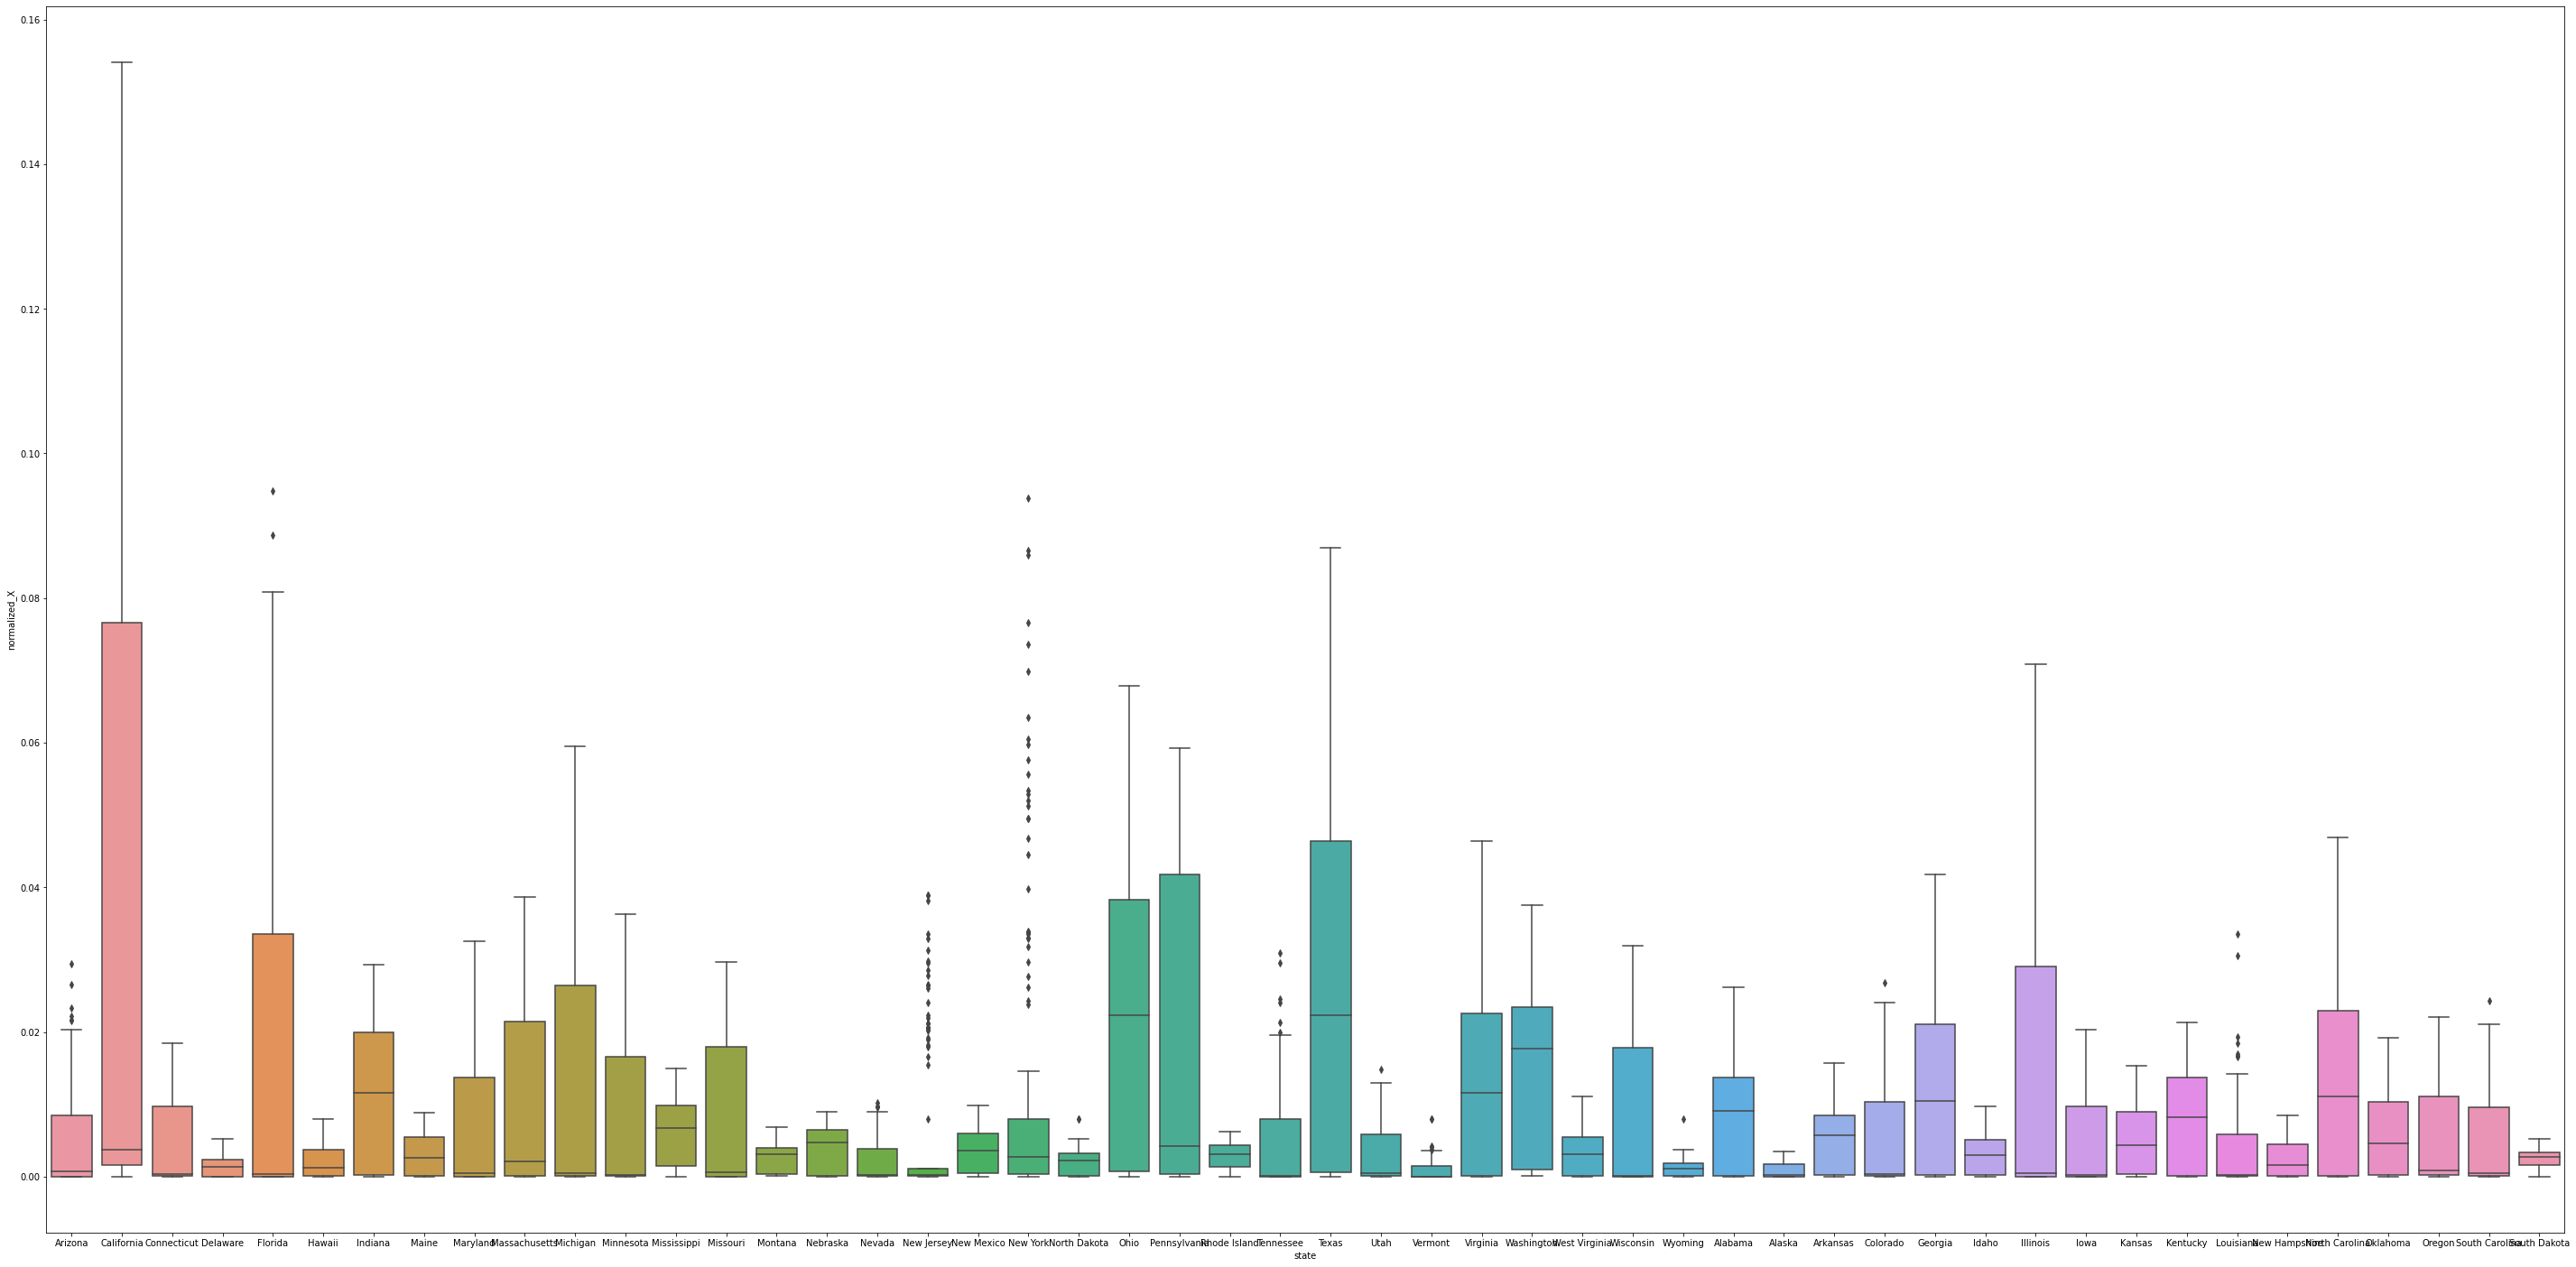

In [ ]:
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(50,25)
sns.boxplot(x='state', y='normalized_X', data=X)

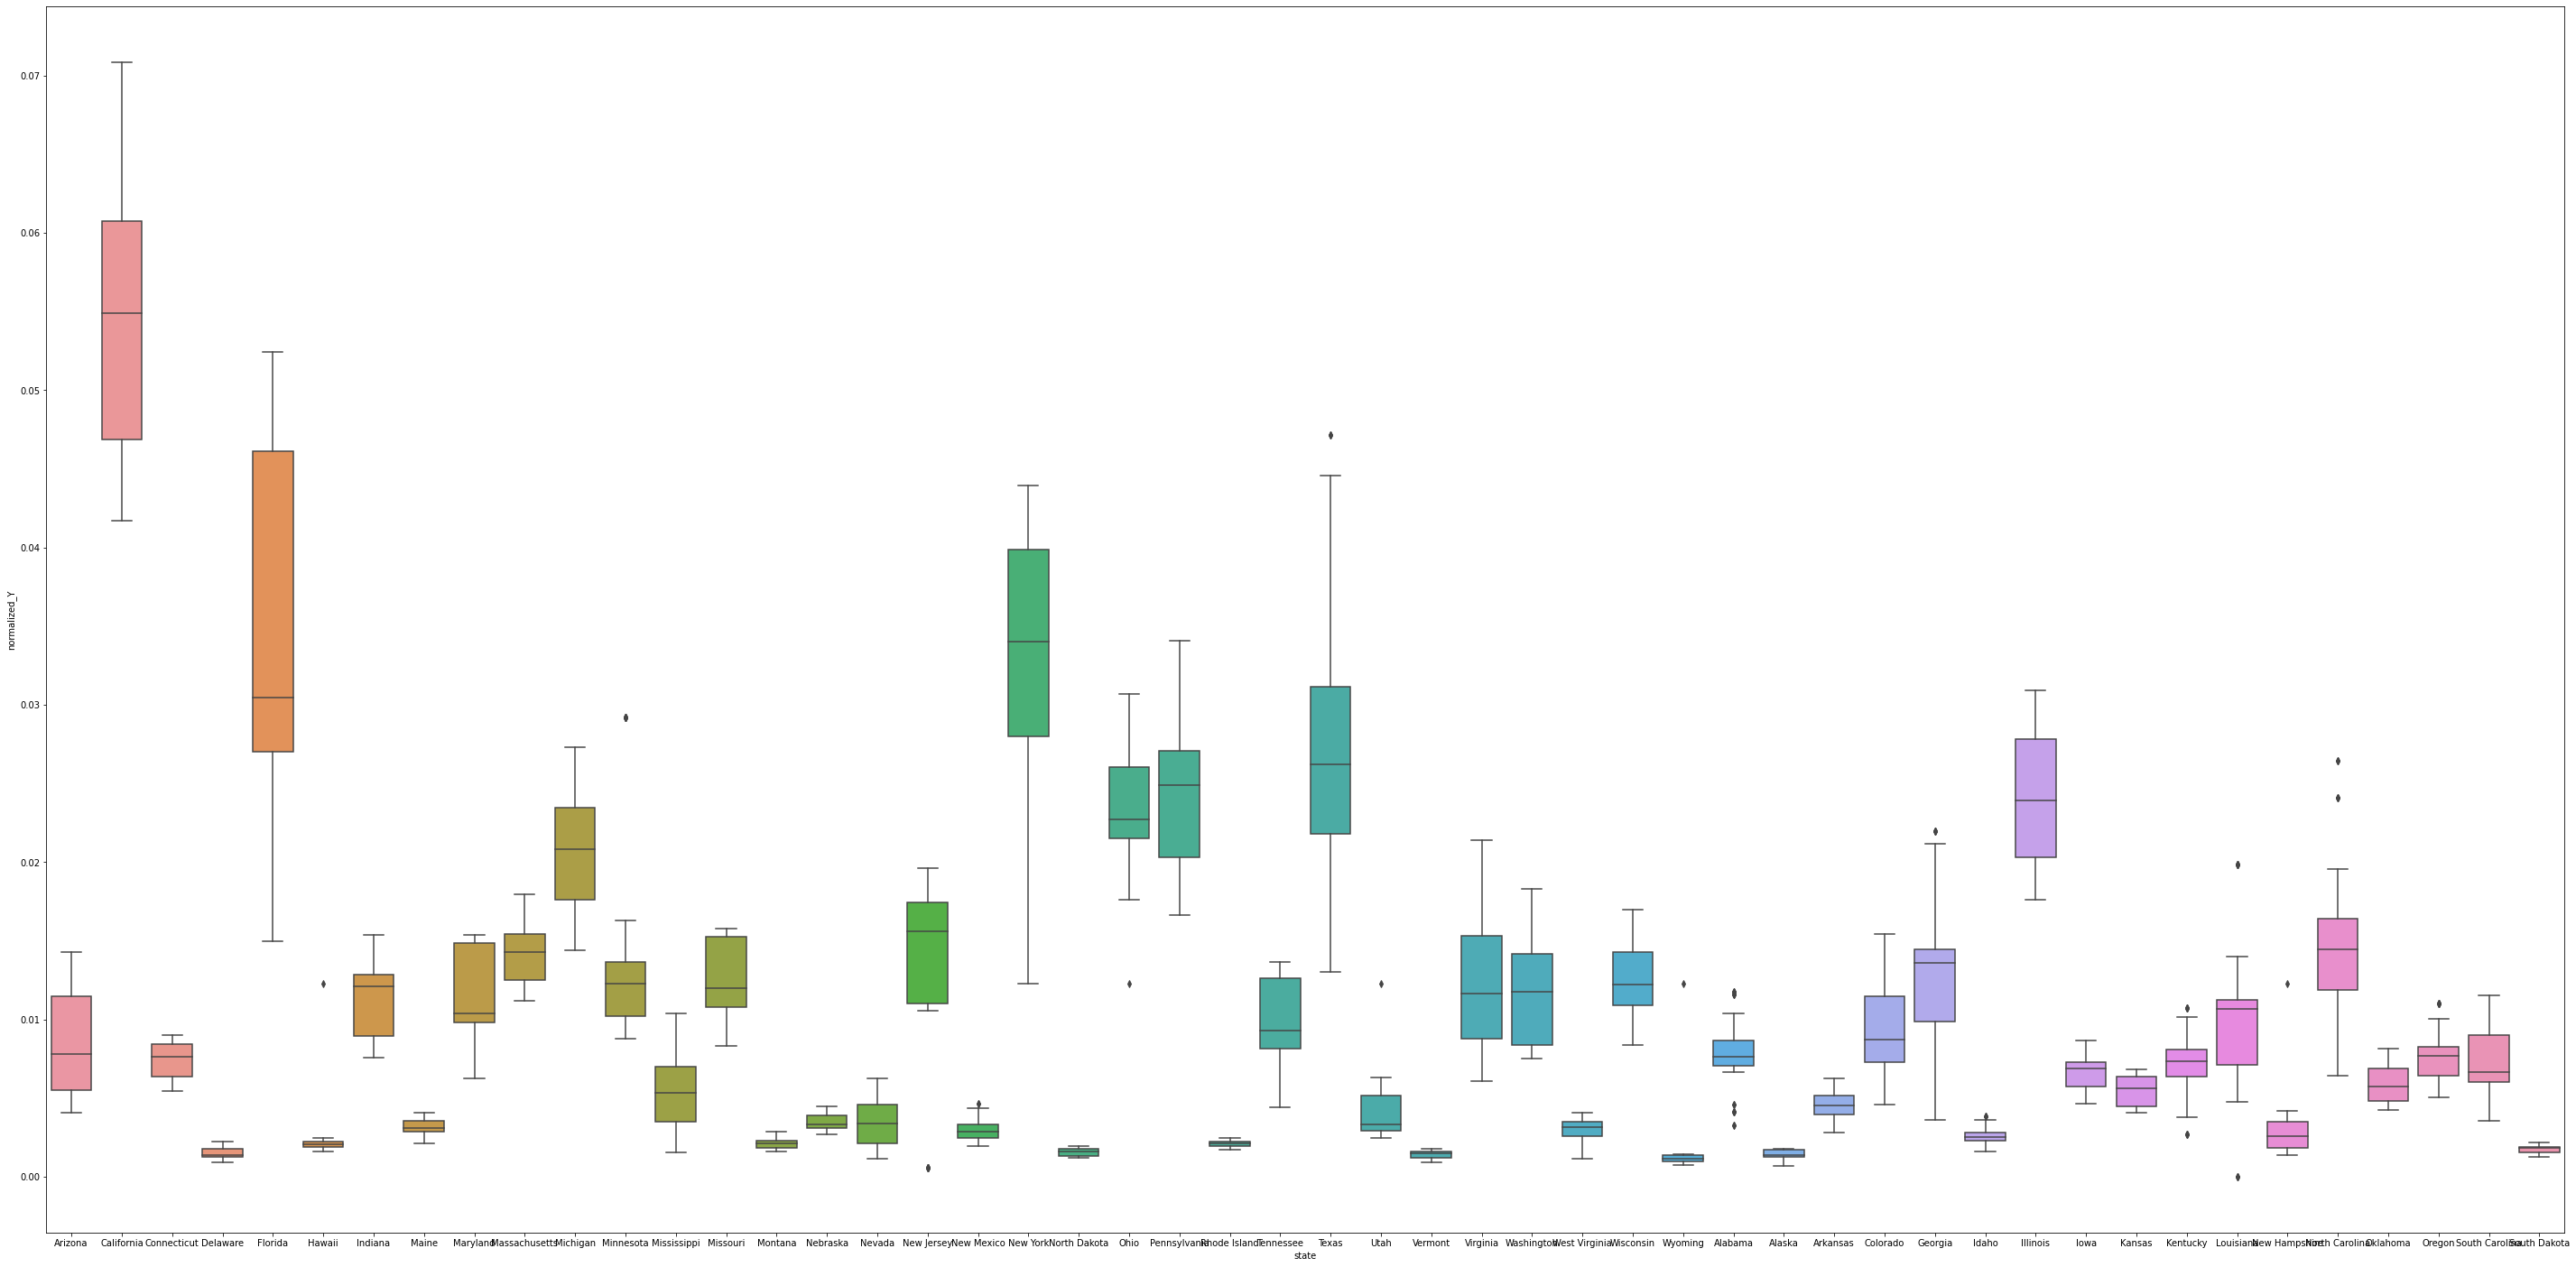

In [ ]:
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(50,25)
sns.boxplot(x="state", y="normalized_Y",
            data=X)

# **Discuss why is normalization is needed? How does it affect dataset?**

Data normalization is a process in which data attributes within a data model are organized to increase the cohesion of entity types. In other words, the goal of data normalization is to reduce and eliminate data redundancy. Redundancy is the unnecessary repetition of data and It can cause problems with storage, retrieval and updation of data. This is an important consideration for application developers because it is incredibly difficult to stores objects in a database that maintains the same information in several places.

a properly designed and well-functioning database should undergo data normalization in order to be used successfully. Data normalization gets rid of a number of anomalies that can make analysis of the data more complicated. Some of those anomalies can crop up from deleting data, inserting more information, or updating existing information. Once those errors are worked out and removed from the system, further benefits can be gained through other uses of the data and data analytics. It is usually through data normalization that the information within a database can be formatted in such a way that it can be visualized and analysed. Without it, a company can collect all the data it wants, but most of it will simply go unused, taking up space and not benefiting the organization in any meaningful way. And when you consider how much money businesses are willing to invest in gathering data and designing databases, not making the most of that data can be a serious detriment.

One of the most notable is the fact that data normalization means databases take up less space. A primary concern of collecting and using big data is the massive amount of memory needed to store it. While storage options have become bigger and more efficient with advances in technology, we now find ourselves in a time when gigabytes, terabytes, and larger simply aren’t cutting it anymore. As such, finding ways to decrease disk space is a priority, and data normalization can do that.
Taking up less disk space is great on its own, but that also has the effect of increasing performance. A database that isn’t bogged down by loads of unnecessary information means data analysis can happen more quickly and efficiently. If you’re struggling with your data analytics, you’ll definitely want to consider data normalization for your database.
The benefits of data normalization go beyond disk space and its related effects. By engaging in this process, you’ll find it easier to change and update data within your database. Since the redundancies and errors are absent, the data is much cleaner and you won’t have to mess around with it as you modify information.


# **Use graphs used to check whether the data is normal** 


yes, the data has been normalised in the graphs as all the ouliers have been removed from the dataset. this can be proven by the box-plot graphs given above.

The boxplot is a great visualization technique because it allows for plotting many boxplots next to each other. Having this very fast overview of variables gives us an idea of distribution and as a bonus, we get the complete 5-number summary (minimum, first quartile, median, third quartile and maximum) that will help us in further analysis.

###**Research Hypothesis:**

***1) Null hypothesis:***  the no. of voters per state is independent of 
the year of voting

***2) Alternate hypothesis:*** the no. of voters per state is dependent on the year of voting

We perform the **Chi-squared** test to test the Hypothesis

In [ ]:
from scipy.stats import chi2_contingency
alpha = 0.05
Y = X['state'].drop_duplicates() 
for i in Y:
  temp = X[X['state']==i]
  data = [temp['year'], temp['totalvotes']]
  stat, p, dof, expected = chi2_contingency(data) 
  if p <= alpha: 
    print('Dependent (reject H0)') 
  else: 
    print('Independent (H0 holds true)')

Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent (reject H0)
Dependent 

After running the *chi-squared* test, we get the result that null hypothesis is **rejected**.

Hence, we have to consider the alternate hypothesis that the number of voters per state is dependant on the year of voting

Correlation

In [ ]:
lb_make = LabelEncoder()
for i in X.columns:
  if(i=="year" or i=="state_fips" or i=="state_cin" or i=="state_ic" or i=="candidate" or i=="candidatevotes" or i=="totalvotes"):
    continue
  X[i+"_code"] = lb_make.fit_transform(X[i])
  X = X.drop(columns=i)
X
for i in X.columns:
  X[i] = pd.to_numeric(X[i])


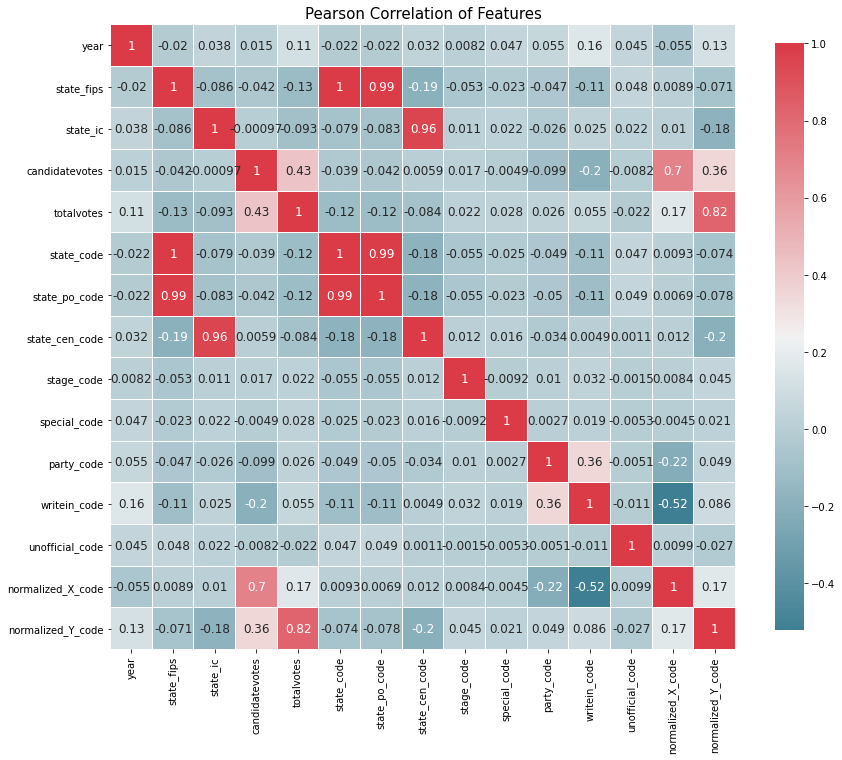

In [ ]:
X.dtypes
X_correlation = X.corr()
#sns.heatmap(X_correlation, fmt='.2g',cmap= 'coolwarm')
#X_correlation
def correlation_heatmap(X):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        X.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(X)

In [ ]:
X

,year,state_fips,state_ic,candidatevotes,totalvotes,state_code,state_po_code,state_cen_code,stage_code,special_code,party_code,writein_code,unofficial_code,normalized_X_code,normalized_Y_code
0,1976,4.0,61.0,321236.000000,7.412100e+05,2,3,42,0,0,121,0,0,2146,264
1,1976,4.0,61.0,1565.000000,7.412100e+05,2,3,42,0,0,56,0,0,328,264
2,1976,4.0,61.0,400334.000000,7.412100e+05,2,3,42,0,0,35,0,0,2232,264
3,1976,4.0,61.0,7310.000000,7.412100e+05,2,3,42,0,0,73,0,0,775,264
4,1976,4.0,61.0,10765.000000,7.412100e+05,2,3,42,0,0,56,0,0,940,264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3416,2018,55.0,25.0,42.000000,2.657841e+06,48,47,13,0,0,121,1,0,37,590
3417,2018,56.0,68.0,136210.000000,2.034200e+05,49,49,39,0,0,121,0,0,1745,24
3418,2018,56.0,68.0,61227.000000,2.034200e+05,49,49,39,0,0,35,0,0,1476,24
3419,2018,56.0,68.0,5658.000000,2.034200e+05,49,49,39,0,0,73,0,0,681,24


In [ ]:
X.describe()

,year,state_fips,state_ic,candidatevotes,totalvotes,state_code,state_po_code,state_cen_code,stage_code,special_code,party_code,writein_code,unofficial_code,normalized_X_code,normalized_Y_code
count,3421.000000,3421.000000,3421.000000,3.421000e+03,3.421000e+03,3421.000000,3421.000000,3421.000000,3421.000000,3421.000000,3421.000000,3421.000000,3421.000000,3421.000000,3421.000000
mean,1998.862321,29.038001,38.965507,4.071739e+05,2.180074e+06,24.247588,24.354867,23.455715,0.002631,0.030985,83.133002,0.125402,0.000877,1482.239696,415.772873
std,12.669946,15.430784,22.745695,7.716553e+05,2.111569e+06,14.262978,14.327326,14.722427,0.051231,0.173303,39.685078,0.331223,0.029604,957.744782,217.133380
min,1976.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1988.000000,17.000000,21.000000,4.802000e+03,6.447800e+05,12.000000,12.000000,11.000000,0.000000,0.000000,35.000000,0.000000,0.000000,629.000000,239.000000
50%,2000.000000,29.000000,41.000000,6.009900e+04,1.543521e+06,24.000000,24.000000,23.000000,0.000000,0.000000,82.000000,0.000000,0.000000,1472.000000,442.000000
75%,2010.000000,41.000000,56.000000,4.765720e+05,2.802641e+06,36.000000,36.000000,36.000000,0.000000,0.000000,121.000000,0.000000,0.000000,2306.000000,601.000000
max,2018.000000,56.000000,82.000000,7.864624e+06,1.257851e+07,49.000000,49.000000,49.000000,1.000000,1.000000,163.000000,1.000000,1.000000,3161.000000,749.000000
